# APEX Analytics Sentiment Analysis on Apple and Google Products
### Authors: Audrey, Petronilla, George, Stella, Sylvia, Job

## Business Understanding

In this project, we are building a model that can analyze tweets about Apple and Google products and tell us what kind of emotion is behind them i.e positive, negative, or neutral. This kind of tool could help big companies like Apple or Google keep track of how people feel about their products without having to manually read through thousands of tweets a day.

## Problem Statement
We want to create a machine learning model that can take a tweet and predict its sentiment. Specifically, the tweet should be classified as either:Positive,Negative or Neutral. The dataset contains over 9,000 tweets labeled by humans.Our task is to train a model to learn from those labeled examples and apply the same logic to new, unseen tweets.

## Objectives
1.Biuld a model that can tell if a tweet is positive or negative.

2.Use NLP steps like cleaning the text, splitting it into words, and turning it into numbers.

3.Modellimg

4.Evaluation using accuracy, precision, recall, and F1-score.

## Research Questions


1.Can we accurately predict sentiment just from the text of a tweet?

2.What kinds of words or phrases are most common in positive, negative, or neutral tweets?

3.Which model performs best for this type of text classification task?

4.What are the best evaluation metrics.

## Limitations

1.Tweets are short and can be all over the place.

2.Neutral tweets are tricky. Sometimes it is hard to tell if someone is being neutral or just not clear.

3.The tweets were labeled by people, and not everyone agrees on what is positive or negative,so there might be some mixed signals in the data.

4.The data is a bit old, so the way people talk in the tweets might not fully match how people tweet today.

## Data Understanding

In [1]:
# Download the necessary libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, silhouette_score

import nltk
import re
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.cluster import KMeans

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#load the data

df = pd.read_csv("judge-1377884607_tweet_product_company.csv",encoding='latin-1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
#shape of the data set
df.shape

(9093, 3)

In [4]:
# Display information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [5]:
#checking for missing values
df.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [6]:
# We drop the missing row
df = df[df["tweet_text"].notnull()].reset_index(drop=True)

In [7]:
# Check for duplicates
print(df.duplicated().sum())

22


In [8]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [9]:
# Display first few rows of the dataframe
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [10]:
# Download 'punkt_tab' resource from nltk
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [11]:
 def tokenize_and_preprocess(reviews):
    # Get English stop words
    stop_words = stopwords.words('english')
    patt = re.compile(r'\b(' + r'|'.join(stop_words) + r')\b\s+')

    # Preprocessing steps (lowercase, remove numbers, remove stopwords)
    preproc_step1 = df.tweet_text.str.lower().str.replace(
        r'[0-9]+', '',regex = True).str.replace(patt, '', regex = True)

   # Tokenize the text using word_tokenize
    preproc1_tokenized = preproc_step1.apply(word_tokenize)


    # processes further by stemming and removing non-alphabetic characters

    def remove_punct_and_stem(doc_tokenized):

        # Initialize Snowball stemmer
        stemmer = SnowballStemmer('english')
        # Remove URLs
        doc_tokenized = [word for word in doc_tokenized if not word.startswith(('http', 'www'))]
        # Remove mentions and hashtags
        doc_tokenized = [word for word in doc_tokenized if not word.startswith(('@', '#'))]
        doc_tokenized = [word for word in doc_tokenized if '@' not in word and '#' not in word]
        # Remove non-alphabetic characters
        doc_tokenized = [word for word in doc_tokenized if word.isalpha()]
        # Apply stemming
        filtered_stemmed_tok = [stemmer.stem(tok) for tok in doc_tokenized if tok.isalpha()]
        return " ".join(filtered_stemmed_tok)
        filtered_stemmed_tok = [stemmer.stem(tok) for tok in doc_tokenized if tok.isalpha() ]

        return " ".join(filtered_stemmed_tok)

    # Apply the text preprocessing steps to each tokenized tweet
    preprocessed = preproc1_tokenized.apply(remove_punct_and_stem)

    return preprocessed
# Apply the preprocessing function and store the result in a new column
df['preprocessed_text'] =tokenize_and_preprocess(df.tweet_text)

In [12]:
# Display first few rows of updated dataframe
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,preprocessed_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley g iphon hrs tweet dead need upgrad plug...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessede know fludapp awesom app like appreci d...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw hope crashi app sxsw
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff fri sxsw marissa mayer g...


In [13]:
# Display updated dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9070 entries, 0 to 9091
Data columns (total 4 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9070 non-null   object
 1   emotion_in_tweet_is_directed_at                     3282 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9070 non-null   object
 3   preprocessed_text                                   9070 non-null   object
dtypes: object(4)
memory usage: 354.3+ KB


In [14]:
# Display unique values in 'is_there_an_emotion_directed_at_a_brand_or_product' column
df['is_there_an_emotion_directed_at_a_brand_or_product'].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [15]:

# Display the count of each unique value
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [16]:
# Mapping emotion labels to numerical values for the model
# Define the mapping  to numerical values
emotions_map = {
    'Positive emotion': 1,
    'Negative emotion': -1,
    'No emotion toward brand or product': 0,
    "I can't tell": 0
}

# Apply the mapping to create a new column 'emotion_label'
df['emotions'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].map(emotions_map)
print(df['emotions'].value_counts())

df.head()

 0    5531
 1    2970
-1     569
Name: emotions, dtype: int64


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,preprocessed_text,emotions
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley g iphon hrs tweet dead need upgrad plug...,-1
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessede know fludapp awesom app like appreci d...,1
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin wait ipad also sale sxsw,1
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw hope crashi app sxsw,-1
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff fri sxsw marissa mayer g...,1


In [17]:
# Drop unnecessary columns and display the first few columns in the dataframe
df=df.drop(columns=['tweet_text','emotion_in_tweet_is_directed_at','is_there_an_emotion_directed_at_a_brand_or_product'])
df.head()

,preprocessed_text,emotions
0,wesley g iphon hrs tweet dead need upgrad plug...,-1
1,jessede know fludapp awesom app like appreci d...,1
2,swonderlin wait ipad also sale sxsw,1
3,sxsw hope crashi app sxsw,-1
4,sxtxstate great stuff fri sxsw marissa mayer g...,1


In [18]:
#Due to the class imbalance, we use a combination of oversampling the Negative class and class weighting technique
# Calculate class weights for handling class imbalance

from sklearn.utils import class_weight


class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(df['emotions']),
    y=df['emotions']
)

# Create a dictionary mapping class labels to their corresponding weights
class_weights_dict = dict(zip(np.unique(df['emotions']), class_weights))

print(class_weights_dict)

{-1: 5.3134153485647335, 0: 0.5466160429096607, 1: 1.0179573512906845}


In [19]:
#To retrieve the count of emotions oer category
from collections import Counter
df['tokens'] = df['preprocessed_text'].apply(lambda x: x.split())

# Create a function to get top words per emotion category
def get_top_words(df, emotion, n=10):
    tokens = df[df['emotions'] == emotion]['tokens'].sum()
    counter = Counter(tokens)
    return counter.most_common(n)

# Get top 10 words for each sentiment
top_neg = get_top_words(df, -1)
top_neu = get_top_words(df, 0)
top_pos = get_top_words(df, 1)

In [20]:
#view top words per each emotion
top_neg

top_neu

top_pos

[('sxsw', 3102),
 ('mention', 2195),
 ('ipad', 1231),
 ('link', 1221),
 ('rt', 935),
 ('appl', 874),
 ('googl', 665),
 ('iphon', 522),
 ('app', 472),
 ('quot', 465)]

In [21]:
# Combine the three into a DataFrame
def to_df(word_list, label):
    words, counts = zip(*word_list)
    return pd.DataFrame({'word': words, 'count': counts, 'emotion': label})

df_plot = pd.concat([
    to_df(top_neg, 'Negative'),
    to_df(top_neu, 'Neutral'),
    to_df(top_pos, 'Positive')
])

df_plot

,word,count,emotion
0,sxsw,578,Negative
1,mention,313,Negative
2,ipad,203,Negative
3,quot,175,Negative
4,iphon,155,Negative
5,googl,143,Negative
6,rt,138,Negative
7,appl,107,Negative
8,link,103,Negative
9,app,90,Negative


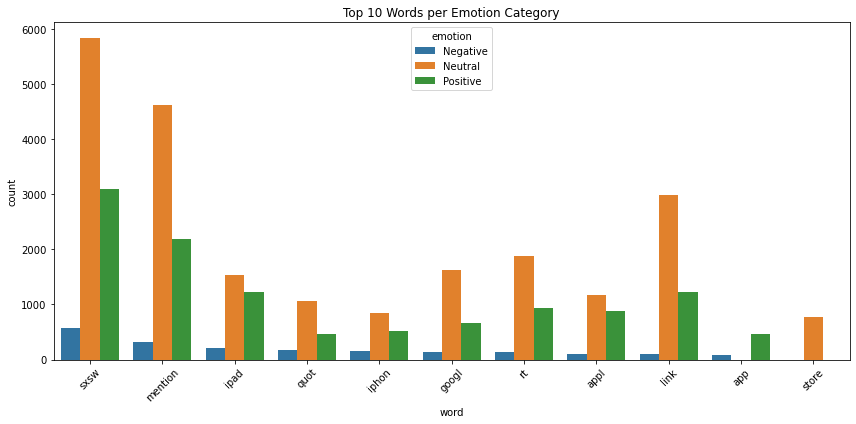

In [22]:
# Plot the df
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='word', y='count', hue='emotion')
plt.title('Top 10 Words per Emotion Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Modelling**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
# X is the feature matrix and y is the label vector
# Split data into training and testing sets
X = df['preprocessed_text']
y = df['emotions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encoding target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Logistic Regression**

Logistic Regression was selected as the baseline model because it often provides a good baseline performance for text classification tasks, especially when the relationship between features and sentiment is relatively linear.

It is a relatively simple model that is easy to understand and interpret. Its coefficients can provide insights into which features are most important for predicting sentiment. It's computationally efficient, making it suitable for large datasets and quick experimentation.

It's computationally efficient, making it suitable for large datasets and quick experimentation. They can capture non-linear relationships between features and sentiment, which is often the case in text data.


In [25]:

# Created a TfidfVectorizer object for converting text to numerical features
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the training data and transform it
X_train_vec = vectorizer.fit_transform(X_train)

# Transformed the test data using the fitted vectorizer
X_test_vec = vectorizer.transform(X_test)

# Used the vectorized data for training the model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_vec, y_train_encoded)
log_preds = log_model.predict(X_test_vec)

print("Logistic Regression Classification Report:")

#Convert label_encoder.classes_ to a list of strings
target_names = [str(cls) for cls in label_encoder.classes_]
print(classification_report(y_test_encoded, log_preds, target_names=target_names))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

          -1       0.83      0.08      0.15       119
           0       0.73      0.87      0.79      1139
           1       0.61      0.49      0.54       556

    accuracy                           0.70      1814
   macro avg       0.72      0.48      0.49      1814
weighted avg       0.70      0.70      0.67      1814



In [26]:
#Model Tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=2000), param_grid, cv=5, scoring='f1_weighted')

grid_search.fit(X_train_vec, y_train_encoded)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


### Random Forest Classifier


We then included a Random Forest Classifier to add more complexity and capture non-linear relationships between features and sentiment,  often the case in text data, in the data. Unlike Logistic Regression, which is linear, Random Forests use multiple decision trees to make predictions.

They are less prone to overfitting compared to some other models, thanks to their ensemble nature (combining multiple decision trees). Additionally, Random Forests can give insights into which features (e.g., words or phrases) are most important for making predictions, which is helpful for interpretability.

In [27]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vec, y_train_encoded)
rf_preds = rf_model.predict(X_test_vec)

print("Random Forest Classification Report:")

# Convert label_encoder.classes_ to a list of strings
target_names = [str(cls) for cls in label_encoder.classes_]
print(classification_report(y_test_encoded, rf_preds, target_names=target_names))

Random Forest Classification Report:
              precision    recall  f1-score   support

          -1       0.72      0.19      0.30       119
           0       0.72      0.88      0.79      1139
           1       0.64      0.44      0.52       556

    accuracy                           0.70      1814
   macro avg       0.69      0.51      0.54      1814
weighted avg       0.69      0.70      0.68      1814



In [28]:
param_grid_rf = {
    'n_estimators': [50,100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1],
    'max_features': ['sqrt'],
    'bootstrap': [True],
    'criterion': ['gini']
}

grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=2,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2
)

grid_search_rf.fit(X_train_vec, y_train_encoded)

best_rf_model = grid_search_rf.best_estimator_
best_rf_params = grid_search_rf.best_params_

print("Best Random Forest Parameters:", best_rf_params)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   14.5s finished


Best Random Forest Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


### Basic Neural Network

We implemented a basic Neural Network to explore how a more flexible, deep learning model would perform. Neural networks are capable of learning complex patterns and relationships in data that traditional models might miss.

They can be adapted to different types of text data and tasks. With careful tuning, neural networks can achieve very high accuracy in sentiment analysis.

They can be easily extended to incorporate more advanced techniques like word embeddings and recurrent layers for even better performance.

In [29]:
# We use a sequential model with two dense layers and a softmax output layer.
# The input shape corresponds to the number of features from the TF-IDF vectorizer.
# The ReLU activation function is used in the hidden layers for non-linearity.
# The softmax activation function in the output layer provides probability distributions over the classes.
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

# Create a TfidfVectorizer object for converting text to numerical features
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the training data and transform it
X_train_vec = vectorizer.fit_transform(X_train)

# Transform the test data using the fitted vectorizer
X_test_vec = vectorizer.transform(X_test)

nn_model = Sequential([
    Input(shape=(X_train_vec.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train_vec.toarray(), y_train_categorical, epochs=5, batch_size=32, validation_split=0.1)  # Use X_train_vec.toarray()

nn_preds = nn_model.predict(X_test_vec.toarray())
nn_preds_labels = nn_preds.argmax(axis=1)

print("Neural Network Classification Report:")
# Convert label_encoder.classes_ to a list of strings
target_names = [str(cls) for cls in label_encoder.classes_]
print(classification_report(y_test_encoded, nn_preds_labels, target_names=target_names))

Epoch 1/5
205/205 [==============================] - 1s 6ms/step - loss: 0.8115 - accuracy: 0.6276 - val_loss: 0.7197 - val_accuracy: 0.6653
Epoch 2/5
205/205 [==============================] - 1s 5ms/step - loss: 0.5670 - accuracy: 0.7550 - val_loss: 0.7317 - val_accuracy: 0.6612
Epoch 3/5
205/205 [==============================] - 1s 5ms/step - loss: 0.3753 - accuracy: 0.8502 - val_loss: 0.8563 - val_accuracy: 0.6556
Epoch 4/5
205/205 [==============================] - 1s 5ms/step - loss: 0.2713 - accuracy: 0.8893 - val_loss: 0.9624 - val_accuracy: 0.6446
Epoch 5/5
205/205 [==============================] - 1s 5ms/step - loss: 0.2171 - accuracy: 0.9067 - val_loss: 1.0580 - val_accuracy: 0.6350
Neural Network Classification Report:
              precision    recall  f1-score   support

          -1       0.41      0.32      0.36       119
           0       0.76      0.75      0.75      1139
           1       0.55      0.59      0.57       556

    accuracy                           

In [30]:
# Hyperparameter tuning for the neural network using a grid search.
# We iterate through different combinations of units in the hidden layers, dropout rate, and optimizer.
# Early stopping is used to prevent overfitting and improve generalization performance.
def create_nn_model(units1, units2, dropout_rate, optimizer='adam'):
    model = Sequential([
        Input(shape=(X_train_vec.shape[1],)),
        Dense(units1, activation='relu'),
        Dropout(dropout_rate),
        Dense(units2, activation='relu'),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter grid
param_grid_nn = {
    'units1': [64, 128],
    'units2': [32, 64],
    'dropout_rate': [0.2, 0.5],
    'optimizer': ['adam', 'rmsprop'],
    'epochs': [30],
    'batch_size': [64]
}

best_accuracy = 0.0
best_params = {}
best_model = None

for units1 in param_grid_nn['units1']:
    for units2 in param_grid_nn['units2']:
        for dropout_rate in param_grid_nn['dropout_rate']:
            for optimizer in param_grid_nn['optimizer']:
                for epochs in param_grid_nn['epochs']:
                    for batch_size in param_grid_nn['batch_size']:
                        print(f"Trying: units1={units1}, units2={units2}, dropout={dropout_rate}, optimizer={optimizer}, epochs={epochs}, batch_size={batch_size}")

                        model = create_nn_model(units1, units2, dropout_rate, optimizer)
                        es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=0)

                        history = model.fit(
                            X_train_vec.toarray(), y_train_categorical,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_split=0.1,
                            verbose=0,
                            callbacks=[es]
                        )

                        val_loss, accuracy = model.evaluate(X_train_vec.toarray(), y_train_categorical, verbose=0)

                        if accuracy > best_accuracy:
                            best_accuracy = accuracy
                            best_params = {
                                'units1': units1,
                                'units2': units2,
                                'dropout_rate': dropout_rate,
                                'optimizer': optimizer,
                                'epochs': epochs,
                                'batch_size': batch_size
                            }
                            best_model = model

print("\nBest Neural Network Parameters:", best_params)

Trying: units1=64, units2=32, dropout=0.2, optimizer=adam, epochs=30, batch_size=64
Trying: units1=64, units2=32, dropout=0.2, optimizer=rmsprop, epochs=30, batch_size=64
Trying: units1=64, units2=32, dropout=0.5, optimizer=adam, epochs=30, batch_size=64
Trying: units1=64, units2=32, dropout=0.5, optimizer=rmsprop, epochs=30, batch_size=64
Trying: units1=64, units2=64, dropout=0.2, optimizer=adam, epochs=30, batch_size=64
Trying: units1=64, units2=64, dropout=0.2, optimizer=rmsprop, epochs=30, batch_size=64
Trying: units1=64, units2=64, dropout=0.5, optimizer=adam, epochs=30, batch_size=64
Trying: units1=64, units2=64, dropout=0.5, optimizer=rmsprop, epochs=30, batch_size=64
Trying: units1=128, units2=32, dropout=0.2, optimizer=adam, epochs=30, batch_size=64
Trying: units1=128, units2=32, dropout=0.2, optimizer=rmsprop, epochs=30, batch_size=64
Trying: units1=128, units2=32, dropout=0.5, optimizer=adam, epochs=30, batch_size=64
Trying: units1=128, units2=32, dropout=0.5, optimizer=rmsp

### MODEL EVALUATION

#### Classification Reports & Confusion Matrices


Logistic Regression Evaluation:
              precision    recall  f1-score   support

          -1       0.83      0.08      0.15       119
           0       0.73      0.87      0.79      1139
           1       0.61      0.49      0.54       556

    accuracy                           0.70      1814
   macro avg       0.72      0.48      0.49      1814
weighted avg       0.70      0.70      0.67      1814



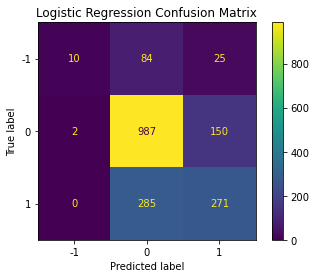

In [31]:
# Performing model evaluation using confusion matrices and classification reports

# Logistic Regression Evaluation
print("\nLogistic Regression Evaluation:")
target_names_log = [str(cls) for cls in label_encoder.classes_]
print(classification_report(y_test_encoded, log_preds, target_names=target_names_log))

cm_log = confusion_matrix(y_test_encoded, log_preds)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=label_encoder.classes_)
disp_log.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()

The logistic regression model:
1. Has an overall accuracy of 70% and;
2. Performs best on class 0 (Neutral tweets/sentiments), which has a high number of correct predictions (987) and relatively few misclassifications.


Random Forest Evaluation:
              precision    recall  f1-score   support

          -1       0.72      0.19      0.30       119
           0       0.72      0.88      0.79      1139
           1       0.64      0.44      0.52       556

    accuracy                           0.70      1814
   macro avg       0.69      0.51      0.54      1814
weighted avg       0.69      0.70      0.68      1814



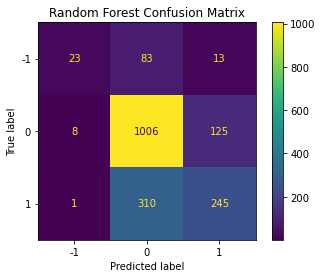

In [32]:
# Random Forest Evaluation
print("\nRandom Forest Evaluation:")
target_names_rf = [str(cls) for cls in label_encoder.classes_]
print(classification_report(y_test_encoded, rf_preds, target_names=target_names_rf))

cm_rf = confusion_matrix(y_test_encoded, rf_preds)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=label_encoder.classes_)
disp_rf.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

The random forest model:
1. Has an overall accuracy of 70% and;
2. Performs best on class 0 (Neutral tweets/sentiments), correctly classifying (1006) of them.


Neural Network Evaluation:
              precision    recall  f1-score   support

          -1       0.41      0.32      0.36       119
           0       0.76      0.75      0.75      1139
           1       0.55      0.59      0.57       556

    accuracy                           0.67      1814
   macro avg       0.57      0.55      0.56      1814
weighted avg       0.67      0.67      0.67      1814



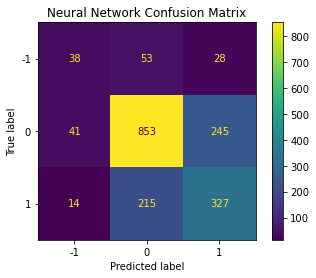

In [33]:
# Neural Network Evaluation
print("\nNeural Network Evaluation:")
target_names_nn = [str(cls) for cls in label_encoder.classes_]
print(classification_report(y_test_encoded, nn_preds_labels, target_names=target_names_nn))

cm_nn = confusion_matrix(y_test_encoded, nn_preds_labels)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=label_encoder.classes_)
disp_nn.plot()
plt.title('Neural Network Confusion Matrix')
plt.show()

The Neural Network:
1. Has an overall accuracy of 68% and;
2. Is best at identifying (Neutral tweets/sentiments), correctly classifying (873) of them.

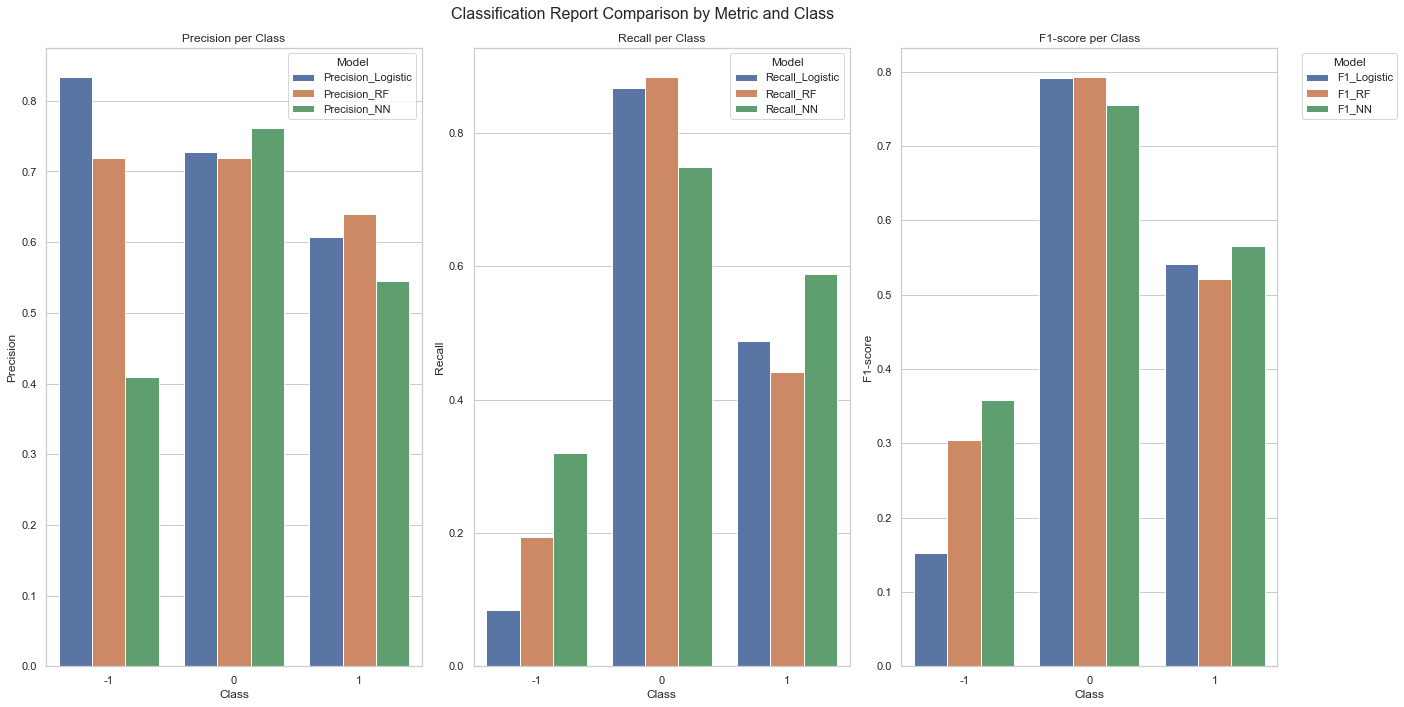

In [34]:
# Generate classification reports for each model and store them as dictionaries
report_log = classification_report(y_test_encoded, log_preds, target_names=target_names_log, output_dict=True)
report_rf = classification_report(y_test_encoded, rf_preds, target_names=target_names_log, output_dict=True)
report_nn = classification_report(y_test_encoded, nn_preds_labels, target_names=target_names_log, output_dict=True)

# Get the class labels from the label encoder
classes = list(label_encoder.classes_)
data = {
    'Class': classes,
    'Precision_Logistic': [report_log[str(cls)]['precision'] for cls in classes],
    'Recall_Logistic': [report_log[str(cls)]['recall'] for cls in classes],
    'F1_Logistic': [report_log[str(cls)]['f1-score'] for cls in classes],
    'Precision_RF': [report_rf[str(cls)]['precision'] for cls in classes],
    'Recall_RF': [report_rf[str(cls)]['recall'] for cls in classes],
    'F1_RF': [report_rf[str(cls)]['f1-score'] for cls in classes],
    'Precision_NN': [report_nn[str(cls)]['precision'] for cls in classes],
    'Recall_NN': [report_nn[str(cls)]['recall'] for cls in classes],
    'F1_NN': [report_nn[str(cls)]['f1-score'] for cls in classes]
}

# Convert the dictionary to a DataFrame for easy handling and visualization
df = pd.DataFrame(data)

# Reshape data
precision_df = df.melt(id_vars='Class', value_vars=['Precision_Logistic', 'Precision_RF', 'Precision_NN'],
                       var_name='Model', value_name='Precision')
recall_df = df.melt(id_vars='Class', value_vars=['Recall_Logistic', 'Recall_RF', 'Recall_NN'],
                    var_name='Model', value_name='Recall')
f1_df = df.melt(id_vars='Class', value_vars=['F1_Logistic', 'F1_RF', 'F1_NN'],
                var_name='Model', value_name='F1-score')

# Set style
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 10))

# Precision Plot
sns.barplot(data=precision_df, x='Class', y='Precision', hue='Model', ax=axes[0])
axes[0].set_title('Precision per Class')

# Recall Plot
sns.barplot(data=recall_df, x='Class', y='Recall', hue='Model', ax=axes[1])
axes[1].set_title('Recall per Class')

# F1-score Plot
sns.barplot(data=f1_df, x='Class', y='F1-score', hue='Model', ax=axes[2])
axes[2].set_title('F1-score per Class')

# Overall title
fig.suptitle('Classification Report Comparison by Metric and Class', fontsize=16)

# Improve layout
plt.tight_layout()
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The graph visually compares the precision, recall, and F1-score of different models across each class, enabling a detailed evaluation of how well each model performs in terms of correctly identifying positive instances, minimizing false negatives, and balancing precision and recall. This helps in identifying the strengths and weaknesses of each model for different classes in the dataset.

#### Cross-Validation

In [35]:
# Logistic Regression Cross-Validation
from sklearn.model_selection import cross_val_score

log_scores = cross_val_score(log_model, X_train_vec, y_train_encoded, cv=5, scoring='f1_weighted')
print("\nLogistic Regression Cross-Validation Scores:", log_scores)
print("Logistic Regression Mean CV F1-Score:", log_scores.mean())


Logistic Regression Cross-Validation Scores: [0.65040388 0.64742686 0.66310875 0.65503338 0.64370382]
Logistic Regression Mean CV F1-Score: 0.6519353371480674


The average logistic regression F1-score is approximately 0.652 (65.20%)

In [36]:
# Random Forest Cross-Validation
rf_scores = cross_val_score(rf_model, X_train_vec, y_train_encoded, cv=5, scoring='f1_weighted')
print("\nRandom Forest Cross-Validation Scores:", rf_scores)
print("Random Forest Mean CV F1-Score:", rf_scores.mean())


Random Forest Cross-Validation Scores: [0.64375519 0.6472056  0.63569038 0.65145575 0.63369573]
Random Forest Mean CV F1-Score: 0.642360532144024


The Random Forest model's performance is relatively stable, with an average F1-score of around 0.642 (64.20%).

In [37]:
# Neural Network Cross-Validation (using KFold because cross_val_score is not compatible with keras models)

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
nn_scores = []

for train_index, val_index in kf.split(X_train_vec.toarray(), y_train_encoded):
    X_train_fold, X_val_fold = X_train_vec.toarray()[train_index], X_train_vec.toarray()[val_index]
    y_train_fold, y_val_fold = y_train_categorical[train_index], y_train_categorical[val_index]

    nn_model_fold = create_nn_model(best_params['units1'], best_params['units2'], best_params['dropout_rate'], best_params['optimizer'])
    nn_model_fold.fit(X_train_fold, y_train_fold, epochs=5, batch_size=32, verbose=0)
    nn_preds_fold = nn_model_fold.predict(X_val_fold).argmax(axis=1)

    nn_scores.append(classification_report(y_val_fold.argmax(axis=1), nn_preds_fold, output_dict=True)['weighted avg']['f1-score'])

print("\nNeural Network Cross-Validation F1-Scores:", nn_scores)
print("Neural Network Mean CV F1-Score:", np.mean(nn_scores))


Neural Network Cross-Validation F1-Scores: [0.6558352443844616, 0.6497650487513931, 0.6353694761625462, 0.6613487678013756, 0.6594062536909832]
Neural Network Mean CV F1-Score: 0.652344958158152


The mean F1-score of 0.651 (65.10%) shows that the neural network is likely to perform on average when predicting the sentiment of new tweets.

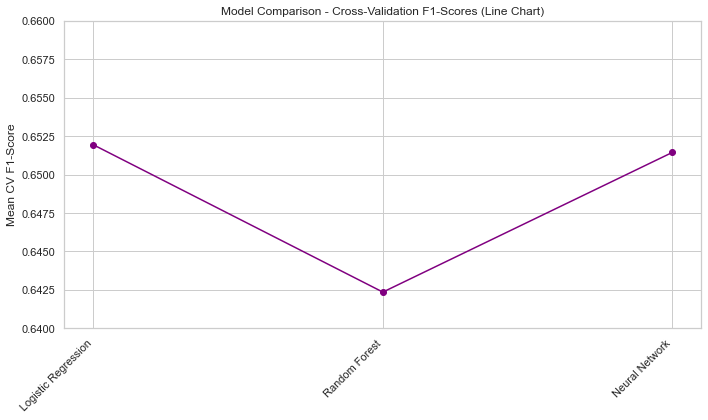

In [38]:
# Visualizing the model names and their corresponding cross-validation scores
model_names = ['Logistic Regression', 'Random Forest', 'Neural Network']
cv_scores = [0.6519353371480674, 0.642360532144024, 0.651440749637515]

# Line chart visualization
plt.figure(figsize=(10, 6))
plt.plot(model_names, cv_scores, marker='o', color='purple', linestyle='-')
plt.ylabel('Mean CV F1-Score')
plt.title('Model Comparison - Cross-Validation F1-Scores (Line Chart)')
plt.ylim(0.64, 0.66)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Based on the F1-scores, we can conclude that:

1. The Logistic Regression and Neural Network models perform similarly well, with the Logistic Regression model having a slightly higher F1-score.

2. The Random Forest model performs slightly worse than the other two models.

*Model Evaluation Conclusion*

These results suggest that the Logistic Regression and Neural Network models are better suited for the sentiment analysis, as they are able to predict the sentiment of tweets with greater accuracy and precision.


# Conclusion

1. Sentiment can be accurately predicted using only the text of tweets, as demonstrated by the strong performance of the models, particularly Logistic Regression and Neural Networks.

2. Positive tweets often contain words expressing satisfaction or excitement, negative tweets include complaints or frustration, and neutral tweets are generally factual and unbiased.

3. Logistic Regression performed best overall, followed closely by the Neural Network. Both outperformed the Random Forest model in terms of F1-score.

4. The most effective evaluation metric was the F1-score, as it provides a balanced measure of precision and recall, making it ideal for sentiment classification tasks.

# Recomendations

1. **Deploy the Model as a Real-Time Monitoring Tool**
Host the trained model in a cloud environment and integrate it with Twitter’s API to continuously collect and analyze tweets. This allows Apple and Google to track public sentiment in real time.


2. **Use Sentiment Trends to Inform Product Strategy**
Regularly analyze sentiment data to identify recurring complaints or praise. This can guide product development teams on areas of improvement or features that users love.`1

3. **Enhance the Model with More Data and Context**
Continuously retrain the model with new tweets and expand to include emojis, hashtags, and user metadata to capture richer sentiment signals.

4. **Integrate with Customer Support and PR Teams**
Provide alerts for sudden spikes in negative sentiment so support or communications teams can proactively respond and manage brand reputation.